# Discrete least squares to understand climate change

_(Jupyter notebook by Simone Brugiapaglia)_

In this notebook we will study discrete least squares approximation and present an application of this technique to climate change data.

For more details, see Chapter 16 of 

*Q. Kong, T. Siauw, and A. M. Bayen. Python Programming and Numerical Methods: A Guide for Engineers and Scientists. Academic Press, 2021. (https://pythonnumericalmethods.berkeley.edu/)*

and Section 8.1 of

*Richard L. Burden, J. Douglas Faires and Annette M. Burden. Numerical Analysis (10th Edition). Cengage, 2016.*

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Linear regression via `curve_fit`

We start by considering the problem of linear least squares. Recall that, given some data $\{(x_i, y_i)\}_{i=1}^m$, the objective is to find a linear function (or, in statistical terms, linear model) $P_1(x) = a_0 + a_1 x$ that best fits the data, in the sense that the discrete least squares error
$$
\sum_{i=1}^m (y_i - P_1(x_i))^2
$$
is as small as possible. A very powerful built-in function to solve this problem (and more general versions of it, where the model is nonlinear) in Python is `curve_fit` from the `scipy.optimize` module.

We test `curve_fit` on data generated as $y_i = 2 x_i + 1 + n_i$, where $n_i$ is random noise.

In [2]:
from scipy import optimize 

m = 50 # number of data points 

x_data = np.random.rand(m)       # generate random x data
noise = 0.1 * np.random.randn(m) # generate random noise
y_data = 2 * x_data + 1 + noise  # generate y data as 2*x + 1 plus noise

linear_model = lambda x,a0, a1: a1 * x + a0 # define linear model

a_opt = optimize.curve_fit(linear_model, xdata = x_data, ydata = y_data)[0]

We observe that the computed $a_0$ and $a_1$ are quite close to the true values $1$ and $2$!

In [3]:
print(a_opt)

[0.99735693 1.99496972]


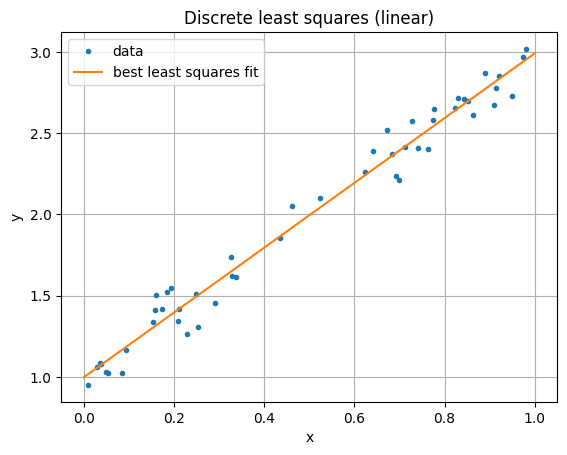

In [4]:
# visualize
x_grid = np.linspace(0,1,2)

plt.plot(x_data, y_data, '.', label = 'data')
plt.plot(x_grid, linear_model(x_grid, a_opt[0], a_opt[1]), label = 'best least squares fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Discrete least squares (linear)')
plt.grid()
plt.show()

## Solving normal equations with `lstsq`

An alternative way to solve discrete least squares in Python is by solving the corresponding system of normal equations. This can be done using the `linalg.lstsq` built-in function of `numpy`. Letting
$$
M = \begin{bmatrix}
1 & x_1 \\
\vdots & \vdots\\
1 & x_m
\end{bmatrix}\in\mathbb{R}^{m \times 2}
\quad
\text{and}
\quad
b = \begin{bmatrix}
y_1 \\ \vdots \\ y_m
\end{bmatrix}\in\mathbb{R}^{m},
$$
the system of normal equations is given by 
$$
M^\top M a = M^\top b,
$$
where $a = [a_0, a_1]^\top$ (check this!). The function `linalg.lstsq` can solve this system and takes $M$ and $b$ as input.

In [5]:
M = np.vstack([np.ones(len(x_data)), x_data]).T # Define data matrix M
b = y_data

# solve least squares problem
a_opt_lstsq = np.linalg.lstsq(M, y_data, rcond = None)[0]

The coefficients $a_0$ and $a_1$ numerically coincide with those computed via `curve_fit`.

In [6]:
print(a_opt_lstsq)

[0.99735693 1.99496972]


## Real-world example: change in sea level temperature

Let's test linear regression via discrete least squares on a climate change application. We consider sea level change data since 1992 from the [NOAA STAR](https://www.star.nesdis.noaa.gov/star/index.php) website 

https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/LSA_SLR_timeseries_global.php

The dataset is stored in the file `data/sea_level.cvs`. This is the result of an average between measurements collected from the NASA satellites [TOPEX/Poseidon](https://eospso.nasa.gov/missions/topexposeidon), [Jason-1](https://www.jpl.nasa.gov/missions/jason-1), [Jason-2](https://www.jpl.nasa.gov/missions/jason-2), and [Jason-3](https://www.jpl.nasa.gov/missions/jason-3), which can be downloaded from the website just mentioned. In order to import the csv dataset, we will use the `pandas` module, very popular in data science applications.

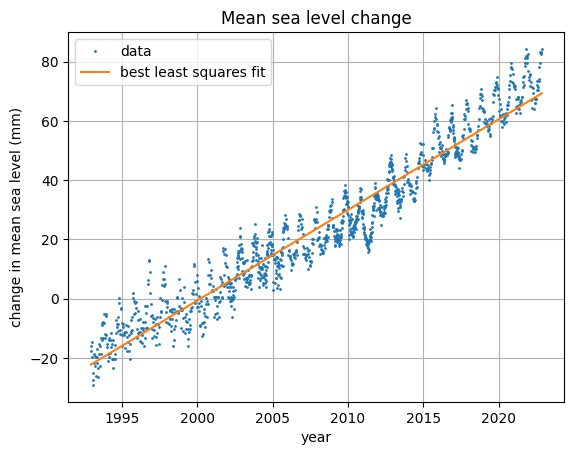

In [7]:
import pandas as pd

# import dataset
data_frame_sea = pd.read_csv('data/sea_level.csv')
x_data_sea = data_frame_sea['year']
y_data_sea = data_frame_sea['mean change']

# perform discrete least squares
a_opt_sea = optimize.curve_fit(linear_model, xdata = x_data_sea, ydata = y_data_sea)[0]

# Visualize results
x_grid_sea = np.linspace(np.min(x_data_sea), np.max(x_data_sea), 100)

plt.plot(x_data_sea, y_data_sea, '.', markersize = 2, label = 'data')
plt.plot(x_grid_sea, linear_model(x_grid_sea, a_opt_sea[0], a_opt_sea[1]), label = 'best least squares fit')
plt.xlabel('year')
plt.ylabel('change in mean sea level (mm)')
plt.legend()
plt.title('Mean sea level change')
plt.grid()
plt.show()

We can print the estimated coefficients $a_0$ and $a_1$

In [8]:
print(a_opt_sea)

[-6.12690918e+03  3.06311536e+00]


In practice, this mean that the resulting trend for mean sea level change is roughly $3.1$ mm / year.

## Recommended problems

1. Try `curve_fit` with nonlinear models, such as polynomial regression. For example, you could replace the linear law in the first example with a quadratic or cubic law, plus noise.
2. Read Section 16.4 of

   *Q. Kong, T. Siauw, and A. M. Bayen. Python Programming and Numerical Methods: A Guide for Engineers and Scientists. Academic Press, 2021. (https://pythonnumericalmethods.berkeley.edu/)*

   and experiment with log transformations to fit models of the form $y = b e^{ax}$ or $y = b x^a$.